downlaod from fashonMNIST  
put downloaded data into data/fashion

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data/fashion', one_hot=True)

Extracting ./data/fashion/train-images-idx3-ubyte.gz
Extracting ./data/fashion/train-labels-idx1-ubyte.gz
Extracting ./data/fashion/t10k-images-idx3-ubyte.gz
Extracting ./data/fashion/t10k-labels-idx1-ubyte.gz


In [3]:
img, label = mnist.train.next_batch(10)

In [4]:
label[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

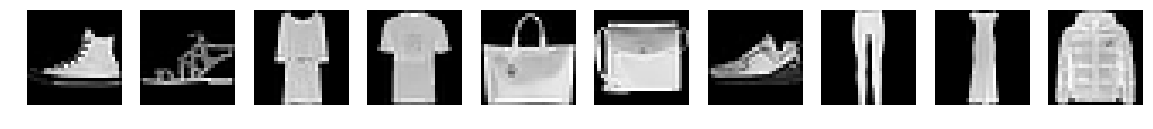

In [6]:
dim = 28
fig, axs = plt.subplots(1, len(img), figsize=(20, 3))
for i, m in enumerate(img):
        axs[i].imshow(np.reshape(m, (dim, dim)),cmap='gray')
        axs[i].axis('off')
plt.show()

In [7]:
def weight_variable(shape):
    w = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(w)

def bias_variable(shape):
    b = tf.constant(0.1, shape=shape)
    return tf.Variable(b)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

def variable_summaries(var):
   
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)

In [19]:
image_size = 28 * 28
log_dir = "./logs"
if tf.gfile.Exists(log_dir):
    tf.gfile.DeleteRecursively(log_dir)
tf.gfile.MakeDirs(log_dir)

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, shape=[None, 784], name='x-input')
    y_ = tf.placeholder(tf.float32, shape=[None, 10], name='y-input')

with tf.name_scope('input_reshape'):    
    x_image = tf.reshape(x, [-1, 28, 28, 1])

with tf.name_scope("layer1"):
    with tf.name_scope('weights'):
        W_conv1 = weight_variable([5,5,1,32])
        variable_summaries(W_conv1)        
    with tf.name_scope('biases'):
        b_conv1 = bias_variable([32])
        variable_summaries(b_conv1)
        
with tf.name_scope("conv1"):
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    variable_summaries(h_conv1)

with tf.name_scope("pool1"):   
    h_pool1 = max_pool_2x2(h_conv1)

with tf.name_scope("layer1"):
    with tf.name_scope('weights'):
        W_conv2 = weight_variable([5,5,32,64])
    with tf.name_scope('biases'):    
        b_conv2 = bias_variable([64])

with tf.name_scope("conv2"):
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

with tf.name_scope("pool2"):
    h_pool2 = max_pool_2x2(h_conv2)
    
with tf.name_scope("pool2_flat"):
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

with tf.name_scope("fc1"):
    with tf.name_scope('weights'):
        W_fc1 = weight_variable([7 * 7 * 64, 1024])
    with tf.name_scope('biases'):   
        b_fc1 = bias_variable([1024])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

with tf.name_scope("dropout"):
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

with tf.name_scope("fc2"):
    W_fc2 = weight_variable([1024,10])
    b_fc2 = bias_variable([10])

with tf.name_scope("output"):
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

with tf.name_scope("loss"):
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
    tf.summary.scalar('cross_entropy', loss)


with tf.name_scope("opt"):
    opt = tf.train.AdamOptimizer(1e-4).minimize(loss)

with tf.name_scope("accuracy"):
    correct = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    tf.summary.scalar('accuracy', accuracy)

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter(log_dir + '/train', sess.graph)
    test_writer = tf.summary.FileWriter(log_dir + '/test')
    for i in range(2000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_loss, train_accuracy = sess.run([loss, accuracy], feed_dict={
                  x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('step %d, training loss %g, training accuracy %g' % (i, train_loss, train_accuracy))
        opt.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training loss 6.48188, training accuracy 0.08


KeyboardInterrupt: 

In [ ]:
image_size = 28 * 28
log_dir = "./logs"
if tf.gfile.Exists(log_dir):
    tf.gfile.DeleteRecursively(log_dir)
tf.gfile.MakeDirs(log_dir)

In [25]:
def nn_layer(input_tensor, input_dim, output_dim, layer_name, act=tf.nn.relu):
    with tf.name_scope(layer_name):
        with tf.name_scope('weights'):
            weights = weight_variable([input_dim, output_dim])
            variable_summaries(weights)
        with tf.name_scope('biases'):
            biases = bias_variable([output_dim])
            variable_summaries(biases)
        with tf.name_scope('Wx_plus_b'):
            preactivate = tf.matmul(input_tensor, weights) + biases
            tf.summary.histogram('pre_activations', preactivate)
        activations = act(preactivate, name='activation')
        tf.summary.histogram('activations', activations)
        return activations

In [17]:

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, shape=[None, 784], name='x-input')
    y_ = tf.placeholder(tf.float32, shape=[None, 10], name='y-input')
    

with tf.name_scope('input_reshape'):
    image_shaped_input = tf.reshape(x, [-1, 28, 28, 1])
    tf.summary.image('input', image_shaped_input, 10)

hidden1 = nn_layer(x, 784, 500, 'layer1')

with tf.name_scope('dropout'):
    #keep_prob = tf.placeholder(tf.float32)
    tf.summary.scalar('dropout_keep_probability', keep_prob)
    dropped = tf.nn.dropout(hidden1, 0.9)

y = nn_layer(dropped, 500, 10, 'layer2', act=tf.identity)

with tf.name_scope('cross_entropy'):
    diff = tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)
    
with tf.name_scope('total'):
    cross_entropy = tf.reduce_mean(diff)
tf.summary.scalar('cross_entropy', cross_entropy)

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(1.0e-4).minimize(cross_entropy)

with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.scalar('accuracy', accuracy)


<tf.Tensor 'accuracy_7:0' shape=() dtype=string>

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter(log_dir + '/train', sess.graph)
    test_writer = tf.summary.FileWriter(log_dir + '/test')

    for i in range(1000):
        if i % 10 == 0:  
            batch = mnist.train.next_batch(50)
            summary, acc = sess.run([merged, accuracy], feed_dict={
                    x: batch[0],  y_: batch[1],  keep_prob: 0.9})
            
            test_writer.add_summary(summary, i)
            print('Accuracy at step %s: %s' % (i, acc))
        else:  # Record train set summaries, and train
            if i % 100 == 99:  # Record execution stats
                run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
                run_metadata = tf.RunMetadata()
                summary, _ = sess.run([merged, train_step],
                              feed_dict=feed_dict(True),
                              options=run_options,
                              run_metadata=run_metadata)
                train_writer.add_run_metadata(run_metadata, 'step%03d' % i)
                train_writer.add_summary(summary, i)
                print('Adding run metadata for', i)
            else:  # Record a summary
                xs, ys = mnist.test.images, mnist.test.labels
                k = 1.0
                summary, _ = sess.run([merged, train_step], feed_dict={x: xs, y_: ys, keep_prob: k})
                train_writer.add_summary(summary, i)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_3' with dtype float and shape [?,784]
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_3', defined at:
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-abb3c1f22efc>", line 5, in <module>
    x = tf.placeholder(tf.float32, shape=[None, 784])
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/tamoto.yoshifumi/anaconda2/envs/py3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_3' with dtype float and shape [?,784]
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
